<a href="https://colab.research.google.com/github/dufunr/resourcealloc/blob/main/resourcealloc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer


In [ ]:
data = pd.read_csv('/content/Dataset(data).csv')

In [ ]:
data.head(20)

,Name,Team,Skills,Interests,Experience,Past Contribution,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Badri Narayan M S,Tech,"Web Development,Python,JavaScript,Java,Fronten...","Mobile App Development, Machine Learning,Hacka...",Intermediate,"Designed websites, posters, worked on a few vi...",NaN,NaN,NaN
1,Samrakshan Badrinath,Tech,"Python, Web Development, JavaScript, Java, UI/...","Python, Cyber Security, Web Development",Intermediate,Developed webpages,NaN,NaN,NaN
2,Harshith Ashok,Tech,"Web Development, Python, Mobile App Developmen...","AI, Leadership, Project Management, Hackathons...",Intermediate,"developed websites, web apps, tools and designs",NaN,NaN,NaN
3,M Kishoreraj,Creatives,"Python, Web Development, AI,JavaScript, Conten...","Cyber Security,Web Development,AI,Design",Intermediate,"Developed websites,tools,multi-model agents",NaN,NaN,NaN
4,Sowmika Selvakumar,Creatives,"Python, Java, Machine Learning, Data Analysis,...","AI, Machine Learning, Creative Writing, Public...",Intermediate,Analysed datasets using Data Analytic Tools an...,NaN,NaN,NaN
5,Prabodh Raj U R,Creatives,"Python, C, Video Editing, Team Coordination, E...","Mobile App Development, Machine Learning, Hack...",Beginner,NIL,NaN,NaN,NaN
6,R Adhokshajan,Tech,"Python,App Development,React Native, Flutter, ...","App Development, Public Speaking",Beginner,Developed mobile apps with basic backend opera...,NaN,NaN,NaN
7,Rohith Vasagam J,Tech,"Python, Web Development, Go, Network Design an...","Cybersecurity, Web Development, ICS",Intermediate,"Developed webpages, webapps, configured multip...",NaN,NaN,NaN
8,Bhavna Roshni,Creatives,"Python, UI/UX Design, Figma, Video Editing, Te...","Web Development, AI, Hackathon, Cybersecurity,...",Intermediate,"Designed websites, posters, worked on a few vi...",NaN,NaN,NaN
9,Ritesh Kumaran S,Tech,"Reactjs, Nextjs, Python, Web development","Full stack, AI, Design, Hackathon",Intermediate,"Designed and developed webapps, participated i...",NaN,NaN,NaN


In [ ]:
data['Skills'] = data['Skills'].fillna('')
data['Interests'] = data['Interests'].fillna('')


In [ ]:
data['Experience'] = data['Experience'].fillna('Unknown')


In [ ]:
data = data.drop_duplicates()

In [ ]:
mlb_skills = MultiLabelBinarizer()
mlb_interests = MultiLabelBinarizer()


In [ ]:
data['Skills'] = data['Skills'].apply(lambda x: x.split(', ') if x != '' else [])
data['Interests'] = data['Interests'].apply(lambda x: x.split(', ') if x != '' else [])

In [ ]:
skills_encoded = mlb_skills.fit_transform(data['Skills'])
interests_encoded = mlb_interests.fit_transform(data['Interests'])

In [ ]:
skills_df = pd.DataFrame(skills_encoded, columns=[f"Skill_{col}" for col in mlb_skills.classes_])
interests_df = pd.DataFrame(interests_encoded, columns=[f"Interest_{col}" for col in mlb_interests.classes_])

In [ ]:
valid_skills = set(mlb_skills.classes_)
valid_interests = set(mlb_interests.classes_)

In [ ]:
le_experience = LabelEncoder()
data['Experience'] = le_experience.fit_transform(data['Experience'])

In [ ]:
data_combined = pd.concat([data, skills_df, interests_df], axis=1)
data_combined.head()

,Name,Team,Skills,Interests,Experience,Past Contribution,Unnamed: 6,Unnamed: 7,Unnamed: 8,Skill_ Leadership,...,Interest_Project Management,Interest_Public Speaking,Interest_Public Speaking,"Interest_Public Speaking,",Interest_Python,Interest_Smart contracts,Interest_Video Editing,Interest_Web Development,"Interest_Web Development,Ai","Interest_machine learning,cybersecurity,"
0,Badri Narayan M S,Tech,"[Web Development,Python,JavaScript,Java,Fronte...","[Mobile App Development, Machine Learning,Hack...",1,"Designed websites, posters, worked on a few vi...",NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,Samrakshan Badrinath,Tech,"[Python, Web Development, JavaScript, Java, UI...","[Python, Cyber Security, Web Development]",1,Developed webpages,NaN,NaN,NaN,0,...,0,0,0,0,1,0,0,1,0,0
2,Harshith Ashok,Tech,"[Web Development, Python, Mobile App Developme...","[AI, Leadership, Project Management, Hackathon...",1,"developed websites, web apps, tools and designs",NaN,NaN,NaN,0,...,1,0,0,0,0,0,0,0,0,0
3,M Kishoreraj,Creatives,"[Python, Web Development, AI,JavaScript, Conte...","[Cyber Security,Web Development,AI,Design]",1,"Developed websites,tools,multi-model agents",NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,Sowmika Selvakumar,Creatives,"[Python, Java, Machine Learning, Data Analysis...","[AI, Machine Learning, Creative Writing, Publi...",1,Analysed datasets using Data Analytic Tools an...,NaN,NaN,NaN,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
print(data_combined.columns[data_combined.columns.duplicated()])

Index([], dtype='object')


In [ ]:
data_combined = data_combined.fillna(0)  # Replace all NaNs with 0

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_combined.drop(columns=['Name', 'Team', 'Skills', 'Interests', 'Past Contribution']))

In [ ]:
imputer = KNNImputer(n_neighbors=5)
scaled_features = imputer.fit_transform(scaled_features)

In [ ]:
kmeans = KMeans(n_clusters=15, random_state=42)  # Adjust clusters as needed
data_combined['Cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pc_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = data_combined['Cluster']

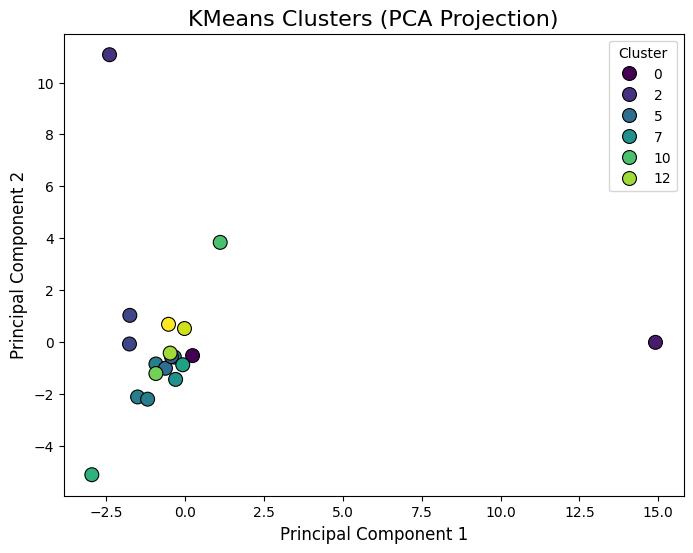

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clusters (PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

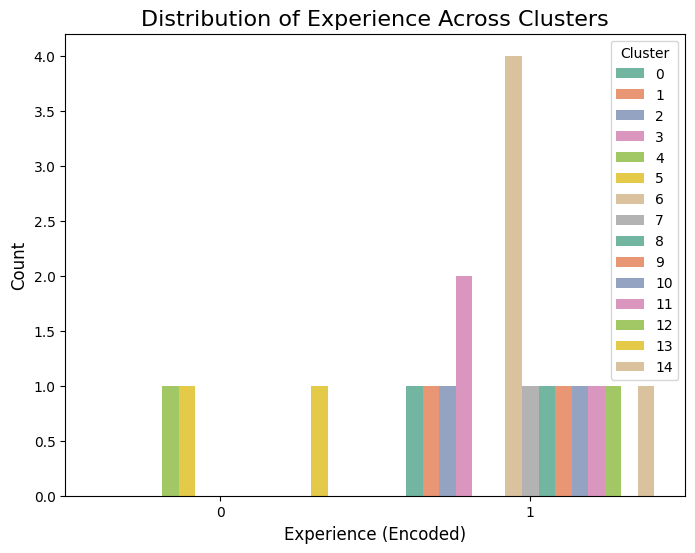

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_combined, x='Experience', hue='Cluster', palette='Set2')
plt.title('Distribution of Experience Across Clusters', fontsize=16)
plt.xlabel('Experience (Encoded)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
def allocate_task(event_name, required_skills, required_interests, required_member_count):
    # Filter required skills and interests
    required_skills = [skill for skill in required_skills if skill in valid_skills]
    required_interests = [interest for interest in required_interests if interest in valid_interests]

    if not required_skills and not required_interests:
        print("No matching skills or interests found in the data.")
        return None, 0

    # Create empty vectors for skills and interests
    full_skills_vector = np.zeros(len(mlb_skills.classes_))
    full_interests_vector = np.zeros(len(mlb_interests.classes_))

    # Update vectors
    for skill in required_skills:
        full_skills_vector[mlb_skills.classes_.tolist().index(skill)] = 1

    for interest in required_interests:
        full_interests_vector[mlb_interests.classes_.tolist().index(interest)] = 1

    # Combine with placeholder for Experience
    required_features = np.hstack([full_skills_vector, full_interests_vector, [0]])

    # Align with scaler's expected input
    scaled_columns = [col for col in data_combined.columns if col not in ['Name', 'Team', 'Skills', 'Interests', 'Past Contribution', 'Cluster']]
    required_features_df = pd.DataFrame([required_features], columns=scaled_columns[:len(required_features)])

    # Add missing columns
    for col in scaled_columns:
        if col not in required_features_df.columns:
            required_features_df[col] = 0  # Add missing columns with default values

    # Reorder columns to match scaler input
    required_features_df = required_features_df[scaled_columns]

    # Scale the features
    required_scaled = scaler.transform(required_features_df)

    # Predict cluster
    cluster_label = kmeans.predict(required_scaled)

    # Get members in predicted cluster
    suitable_members = data_combined[data_combined['Cluster'] == cluster_label[0]]
    suitable_members_count = len(suitable_members)

    if suitable_members_count >= required_member_count:
        suitable_members = suitable_members.head(required_member_count)
    else:
        print(f"Warning: Only {suitable_members_count} members available for the task.")

    return suitable_members[['Name', 'Skills', 'Interests']], suitable_members_count


In [ ]:
event_name = "UI/UX Design Sprint"
required_skills = ['Figma', 'Adobe XD', 'Prototyping']
required_interests = ['Design', 'User Experience', 'Creativity']
required_member_count = 2

In [ ]:
suitable_members, suitable_members_count = allocate_task(event_name, required_skills, required_interests, required_member_count)
print(suitable_members)

                   Name                                             Skills  \
1  Samrakshan Badrinath  [Python, Web Development, JavaScript, Java, UI...   
3          M Kishoreraj  [Python, Web Development, AI,JavaScript, Conte...   

                                    Interests  
1   [Python, Cyber Security, Web Development]  
3  [Cyber Security,Web Development,AI,Design]  


In [ ]:
silhouette_avg = silhouette_score(scaled_features, data_combined['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.02


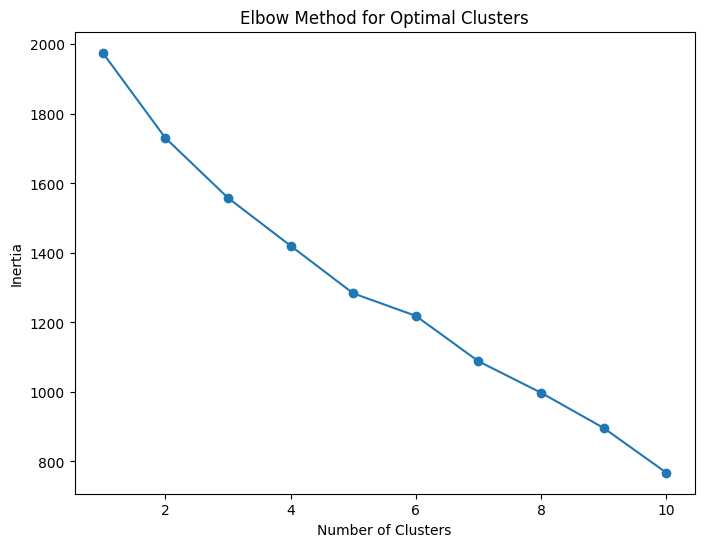

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

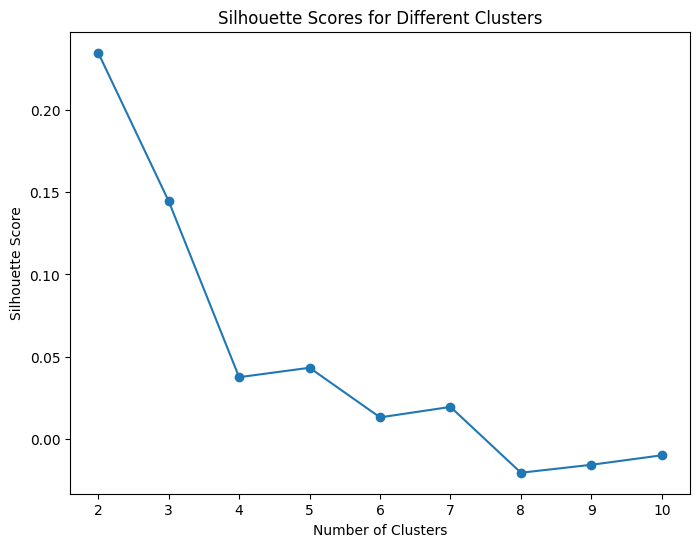

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_components)

KMeans(n_clusters=3, random_state=42)

In [ ]:
silhouette_avg = silhouette_score(principal_components, kmeans.labels_)
print(f"Silhouette Score after PCA: {silhouette_avg:.2f}")

Silhouette Score after PCA: 0.72


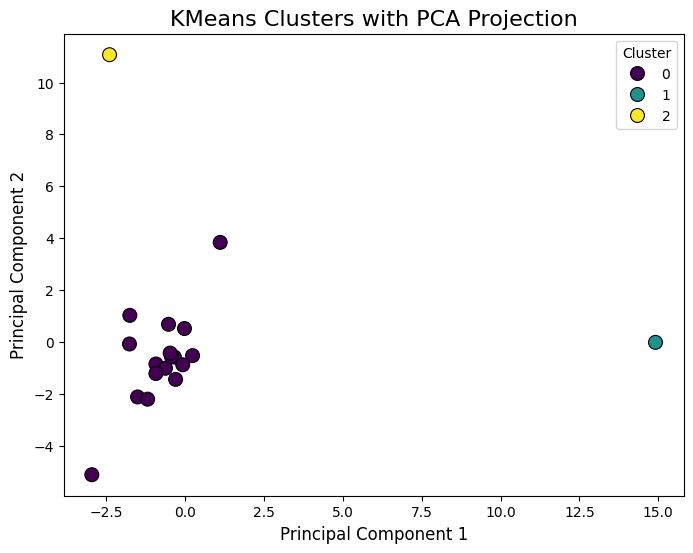

In [ ]:
# Visualizing PCA clusters
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clusters with PCA Projection', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

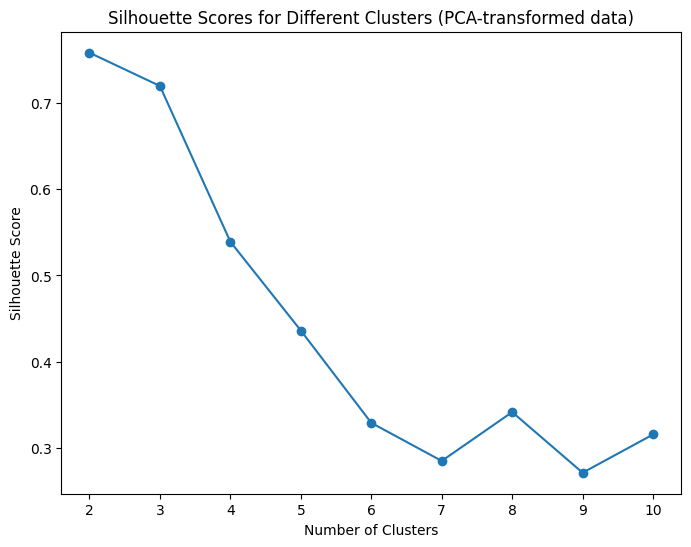

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(principal_components)
    silhouette_scores.append(silhouette_score(principal_components, kmeans_temp.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters (PCA-transformed data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()